In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [134]:
def close_files():
    for i in range(0,index):
        files[i].close()
    benchmark.close()

In [16]:
mat_bench = h5py.File("../cmake-build-debug/SIAM_SOPT_FFT.h5")

In [17]:
list(mat_bench)

['Gamma',
 'ImPi_a_odd_even',
 'ImPi_a_odd_odd',
 'ImSE',
 'RePi_a_odd_even',
 'RePi_a_odd_odd',
 'ReSE',
 'U',
 'beta',
 'data-points-in-calculation',
 'max-time-span',
 'v']

In [24]:
print(np.array(mat_bench['Gamma']))

[ 1.]


In [39]:
mat_v = np.array(mat_bench['v'])
matReSER = np.array(mat_bench['ReSE'])
matImSER = np.array(mat_bench['ImSE'])

matRePiaOO = np.array(mat_bench['RePi_a_odd_odd'])
matImPiaOO = np.array(mat_bench['ImPi_a_odd_odd'])
matRePiaOE = np.array(mat_bench['RePi_a_odd_even'])
matImPiaOE = np.array(mat_bench['ImPi_a_odd_even'])

In [219]:
benchmark_2 = h5py.File("../cmake-build-debug/SOPT_SE.h5")

In [223]:
v = np.array(benchmark_2['v'])

BenchReSER2 = np.array(benchmark_2['Bench_ReSER'])
BenchImSER2 = np.array(benchmark_2['Bench_ImSER'])
BenchReSEK2 = np.array(benchmark_2['Bench_ReSEK'])
BenchImSEK2 = np.array(benchmark_2['Bench_ImSEK'])

BenchRePiaOO2 = np.array(benchmark_2['Bench_RePiaOO'])
BenchImPiaOO2 = np.array(benchmark_2['Bench_ImPiaOO'])
BenchRePiaOE2 = np.array(benchmark_2['Bench_RePiaOE'])
BenchImPiaOE2 = np.array(benchmark_2['Bench_ImPiaOE'])

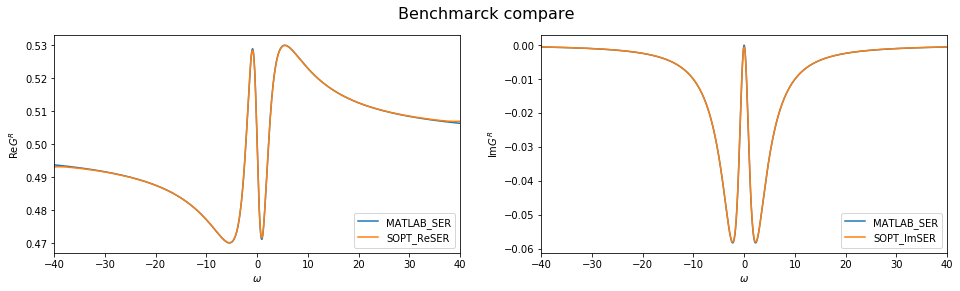

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Benchmarck compare", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*40); 
    ax[i].set_xlabel('$\omega$');
    
ax[0].set_ylabel('Re$G^R$'); ax[1].set_ylabel('Im$G^R$');
ax[0].plot(mat_v, matReSER+0.5, label='MATLAB_SER')
ax[0].plot(v, BenchReSER, label='SOPT_ReSER')
ax[0].legend(loc='lower right');

ax[1].plot(mat_v, matImSER, label='MATLAB_SER')
ax[1].plot(v, BenchImSER, label='SOPT_ImSER')
ax[1].legend(loc='lower right');


In [185]:
index =11

In [278]:
bBubbles = h5py.File("../cmake-build-debug/SOPT_Bubbles.h5")

In [281]:
bBubbles.close()

In [279]:
bv = np.array(bBubbles['v']);

bRePiaOO = np.array(bBubbles['Bench_RePiaOO'])
bImPiaOO = np.array(bBubbles['Bench_ImPiaOO'])
bRePiaOE = np.array(bBubbles['Bench_RePiaOE'])
bImPiaOE = np.array(bBubbles['Bench_ImPiaOE'])

In [305]:
files = [h5py.File("../cmake-build-debug/SOPT_flowstep_" + str(i) +".h5") for i in range(0,index)]

In [306]:
w = np.array(files[0]['w'])

In [307]:
ReSER = [np.array(files[i]['SOPT_ReSER']) for i in range(0, index)]
ImSER = [np.array(files[i]['SOPT_ImSER']) for i in range(0, index)]
ReSEK = [np.array(files[i]['SOPT_ReSEK']) for i in range(0, index)]
ImSEK = [np.array(files[i]['SOPT_ImSEK']) for i in range(0, index)]

RePiaOO = [np.array(files[i]['SOPT_RePiaOO'])for i in range(0, index)]
ImPiaOO = [np.array(files[i]['SOPT_ImPiaOO'])for i in range(0, index)]
RePiaOE = [np.array(files[i]['SOPT_RePiaOE'])for i in range(0, index)]
ImPiaOE = [np.array(files[i]['SOPT_ImPiaOE'])for i in range(0, index)]

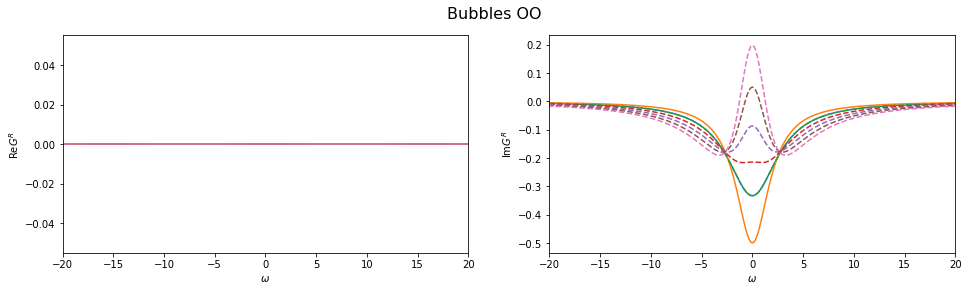

In [308]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Bubbles OO", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-20,20))); 
    ax[i].set_xlabel('$\omega$');
    #ax[i].set_ylim(np.array((-0.05, 0.05)))

#ax[1].set_ylim(np.array((-0.01,0.01)));
ax[0].set_ylabel('Re$G^R$'); ax[1].set_ylabel('Im$G^R$');

ax[0].plot(bv, bRePiaOO2, label='SOPT_RePiaOO');
ax[0].plot(bv, bRePiaOO, label='SOPT_RePiaOO');
ax[1].plot(bv, bImPiaOO2, label='SOPT_ImPiaOO');
ax[1].plot(bv, bImPiaOO, label='SOPT_ImPiaOO');
for i in range(0,5):
    ax[0].plot(w, 0.25*RePiaOO[i], '--')
    ax[1].plot(w, 0.25*ImPiaOO[i], '--')


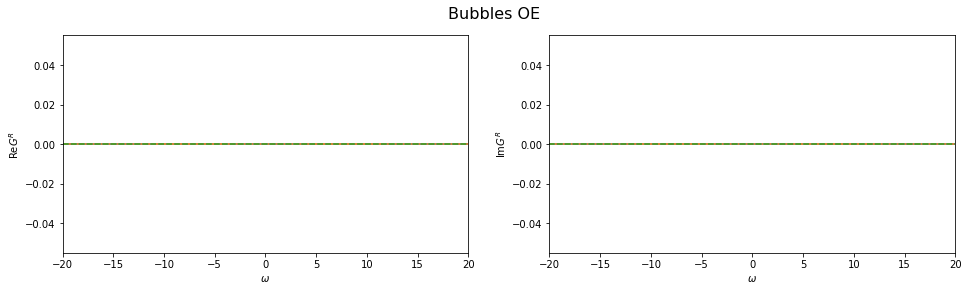

In [309]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Bubbles OE", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-20,20))*1); 
    ax[i].set_xlabel('$\omega$');
    #ax[i].set_ylim(np.array((-0.05, 0.05)))
ax[0].set_ylabel('Re$G^R$'); ax[1].set_ylabel('Im$G^R$');

ax[0].plot(bv, bRePiaOE2, label='SOPT_RePiaOO');
ax[0].plot(bv, bRePiaOE, label='SOPT_RePiaOO');
ax[1].plot(bv, bImPiaOE2, label='SOPT_ImPiaOO');
ax[1].plot(bv, bImPiaOE, label='SOPT_ImPiaOO');
for i in range(0,index):
    ax[0].plot(w, 0.5*RePiaOE[i], '--')
    ax[1].plot(w, 0.5*ImPiaOE[i], '--')


In [310]:
close_files()

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Retarded Self Energy", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*20); 
    ax[i].set_xlabel('$\omega$');
    
ax[0].set_ylabel('Re$G^R$'); ax[1].set_ylabel('Im$G^R$');
ax[0].plot(v, BenchReSER, label='SOPT_ReSER')
ax[1].plot(v, BenchImSER, label='SOPT_ImSER')
for i in range(index):
    ax[0].plot(w, ReSER[i], '--')
    ax[1].plot(w, ImSER[i], '--')
#    ax[0].plot(w,cReSER[i], '--')
#    ax[1].plot(w,cImSER[i], '--')



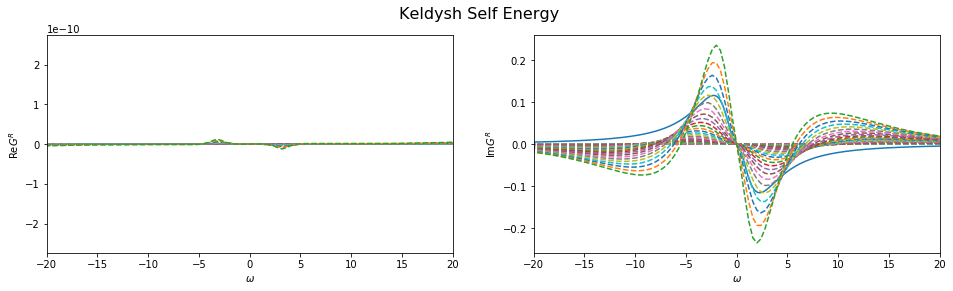

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Keldysh Self Energy", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*20); 
    ax[i].set_xlabel('$\omega$');
    
ax[0].set_ylabel('Re$G^R$'); ax[1].set_ylabel('Im$G^R$');
ax[0].plot(v, BenchReSEK, label='SOPT_ReSEK')
ax[1].plot(v, BenchImSEK, label='SOPT_ImSEK')
for i in range(index):
    ax[0].plot(w, ReSEK[i], '--')
    ax[1].plot(w, ImSEK[i], '--')
#    ax[0].plot(w,cReSEK[i], '--')
#    ax[1].plot(w,cImSEK[i], '--')

In [ ]:
prop_file.close()
propI_file.close()
actual_file.close()

In [ ]:
prop_file = h5py.File("../cmake-build-debug/propagator.h5")
propI_file = h5py.File("../cmake-build-debug/propagatorI.h5")
actual_file = h5py.File("../cmake-build-debug/actual_propagator.h5")

In [ ]:
v = np.array(prop_file['v'])

In [ ]:
ReSR = np.array(prop_file['ReSR'])
ImSR = np.array(prop_file['ImSR'])
ReSK = np.array(prop_file['ReSK'])
ImSK = np.array(prop_file['ImSK'])

ReSR_I = np.array(propI_file['ReSR'])
ImSR_I = np.array(propI_file['ImSR'])
ReSK_I = np.array(propI_file['ReSK'])
ImSK_I = np.array(propI_file['ImSK'])

aReSR = np.array(actual_file['acRSR'])
aImSR = np.array(actual_file['acISR'])
aReSK = np.array(actual_file['acRSK'])
aImSK = np.array(actual_file['acISK'])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Retarded Propagator", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*20); 
    ax[i].set_xlabel('$\omega$');
    
ax[0].set_ylabel('Re$S^R$'); ax[1].set_ylabel('Im$S^R$');

ax[0].plot(v, ReSR, label='SR_woIP')
ax[0].plot(v, ReSR_I, label='SR_wIP')
ax[0].plot(v,aReSR,'--', label='SRactual')
ax[0].legend(loc='lower right');

ax[1].plot(v, ImSR, label='SR_woIP')
ax[1].plot(v, ImSR_I, label='SR_wIP')
ax[1].plot(v,aImSR,'--', label='SRactual')
ax[1].legend(loc='lower right');

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("Keldysh Propagator", fontsize=16)
for i in range(2):
    ax[i].set_xlim(np.array((-1,1))*.20); 
    ax[i].set_xlabel('$\omega$');
    
ax[0].set_ylabel('Re$S^R$'); ax[1].set_ylabel('Im$S^R$');

ax[0].plot(v, ReSK, label='SK_woIP')
ax[0].plot(v, ReSK_I, label='SK_wIP')
ax[0].plot(v,aReSK,'--', label='SKactual')
ax[0].legend(loc='lower right');

ax[1].plot(v, ImSK, label='SK_woIP')
ax[1].plot(v, ImSK_I, label='SK_wIP')
ax[1].plot(v,aImSK,'--', label='SKactual')
ax[1].legend(loc='lower right');